In [94]:
%config IPCompleter.greedy=True

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [96]:
data = pd.read_csv('results.csv')
data

,n,min,max
0,100,1,31
1,100,6,30
2,100,3,21
3,100,4,32
4,100,2,30
...,...,...,...
99995,10000,4,384
99996,10000,4,423
99997,10000,6,444
99998,10000,2,358


In [97]:
summary = data.groupby('n').agg([np.min, np.max, np.mean, np.var, np.std])
summary

min                                  max                             \
      amin amax   mean       var       std amin amax     mean          var   
n                                                                            
100      1   12  3.384  3.191736  1.786543   16   49   29.050    38.734234   
200      1   12  3.427  3.340011  1.827570   22   74   43.738    94.331688   
300      1   10  3.523  3.384856  1.839798   28   99   53.979   137.538097   
400      1   12  3.574  3.634158  1.906347   29  114   63.693   200.032784   
500      1   12  3.394  3.620384  1.902731   34  136   72.026   242.349674   
...    ...  ...    ...       ...       ...  ...  ...      ...          ...   
9600     1   18  3.473  3.586858  1.893900  181  659  338.374  5597.487612   
9700     1   12  3.469  3.504544  1.872043  177  650  340.590  5469.599499   
9800     1   14  3.524  4.163588  2.040487  179  654  337.255  5344.808784   
9900     1   14  3.557  4.086838  2.021593  163  700  344.881  5556.465304   
10000    1   15  3.542  3.810046  1.951934  179  607  345.212  5774.789846   

                  
             std  
n                 
100     6.223683  
200     9.712450  
300    11.727664  
400    14.143295  
500    15.567584  
...          ...  
9600   74.816359  
9700   73.956741  
9800   73.108199  
9900   74.541702  
10000  75.992038  

[100 rows x 10 columns]

In [98]:
min = summary['min']
max = summary['max']

# Nierówność Czebyszewa

Do analizy danych użyjemy nierówności Czebyszewa. Dla przypomnienia - wygląda ona następująco:

$P(|X - E(X)| \geq t) \leq \frac{\mathrm{Var}(X)}{t^2}$.

Przyjmijmy ograniczenie $\frac{\mathrm{Var}(X)}{t^2} = g$ i stąd otrzymujemy $t = \sqrt{\frac{\mathrm{Var}(X)}{g}}$.


In [99]:
def compute_t(data, g):
    return np.sqrt(data['var'] / g)

Dla nierówności Czebyszewa możemy wyliczyć górne oraz dolne ograniczenia:
    
$X_u = E(X) + t$

$X_t = E(X) - t$

In [100]:
def compute_chebyschev_bounds(data, t):
    return data['mean'] + t, data['mean'] -t

In [101]:
def draw_plot(data, t, xu, xl, th_ex=None):
    x = np.linspace(100, 10000, 100)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(x, data['amin'], label='min')
    ax.plot(x, data['amax'], label='max')
    ax.plot(x, data['mean'], label='mean')
    ax.plot(x, xu, label='chebyschev upper')
    ax.plot(x, xl, label='chebyschev lower')
    
    if th_ex != None:
        ax.plot(x, th_ex, label='theoretical Ex')
    
    ax.legend()

# Analiza dla najkrótszych ścieżek (protection number)

In [102]:
t_min = compute_t(min, 0.1)
xu_min, xl_min = compute_chebyschev_bounds(min, t_min)

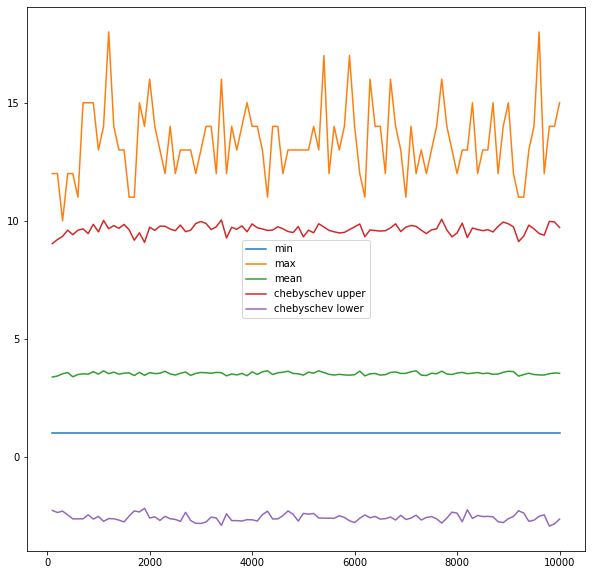

In [103]:
draw_plot(min, t_min, xu_min, xl_min)

In [111]:
data_protection = pd.read_csv('results_protection.csv')
data_protection

,k,v
0,2,1429843
1,3,5712534
2,1,2857623


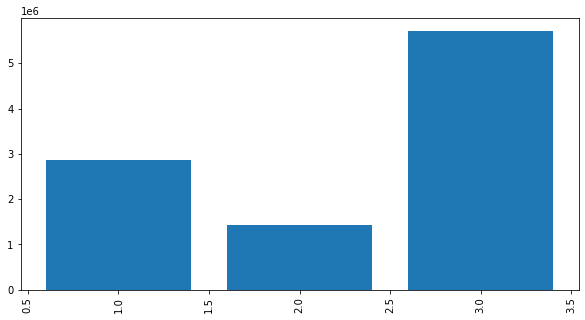

In [112]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar(data_protection['k'], data_protection['v'])
plt.show()	// a.TestForDifferentN()
	// a.TestUniformDistribution()

# Analiza dla najdłuższych ścieżek

In [104]:
t_max = compute_t(max, 0.1)
xu_max, xl_max = compute_chebyschev_bounds(max, t_max)

In [105]:
th_ex_max = [3.5*math.sqrt(x) for x in range(100, 10001, 100)]

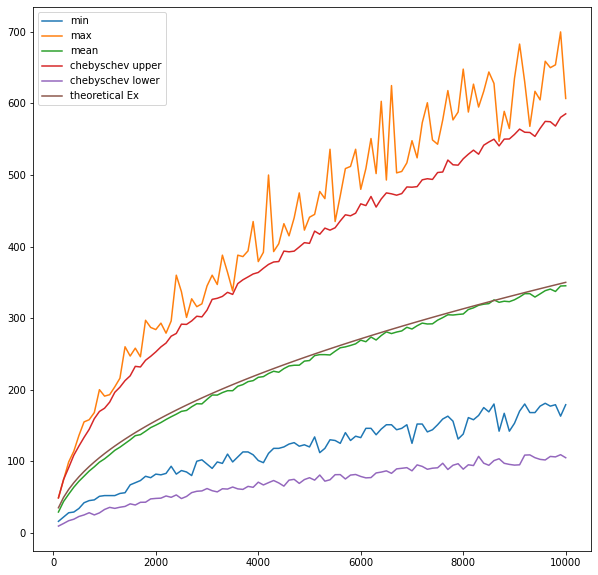

In [109]:
draw_plot(max, t_max, xu_max, xl_max, th_ex_max)

# Rozkład jednostajny

Wybierzmy teraz $n = 4$ i pokażmy dla niego, że drzewa są generowane z rozkładem jednostajnym ($10^7$ powtórzeń)

In [107]:
data_uniform = pd.read_csv('results_uniform.csv')
data_uniform

,k,v
0,1-111-11-1-1,714772
1,111-1-11-1-1,714674
2,11-11-11-1-1,713813
3,11-1-11-11-1,715660
4,1111-1-1-1-1,714309
5,11-11-1-11-1,713788
6,11-111-1-1-1,715395
7,111-11-1-1-1,714121
8,1-111-1-11-1,714307
9,11-1-111-1-1,714066


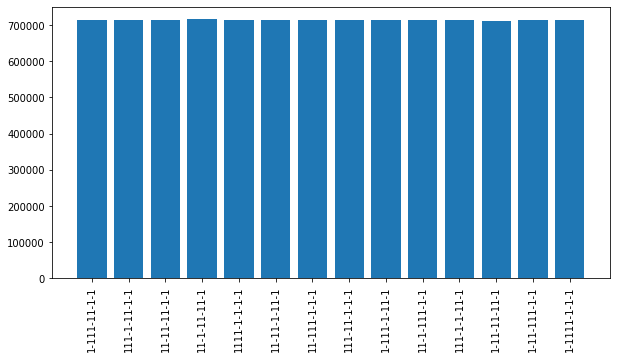

In [108]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar(data_uniform['k'], data_uniform['v'])
plt.show()